<a href="https://colab.research.google.com/github/prachichatur04/World-Happiness-Report-data-scienece-project/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing dependencies
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/prachichatur04/World-Happiness-Report-data-scienece-project/main/2017.csv"
)

In [ ]:
# Viewing data in the file
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


3. What are the data types? (Only numeric and categorical)
The above are the datatypes present in the dataset

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

4. Are there missing values?

In [ ]:
# checking if the any data is missing
data.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

There are no missing values in the dataset

5. What are the likely distributions of the numeric variables?

<Figure size 800x500 with 0 Axes>

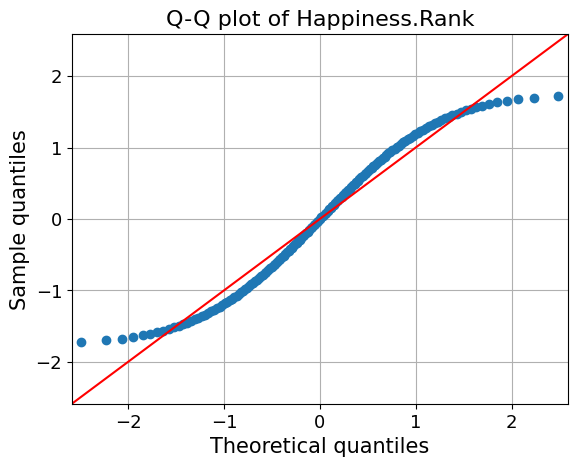

<Figure size 800x500 with 0 Axes>

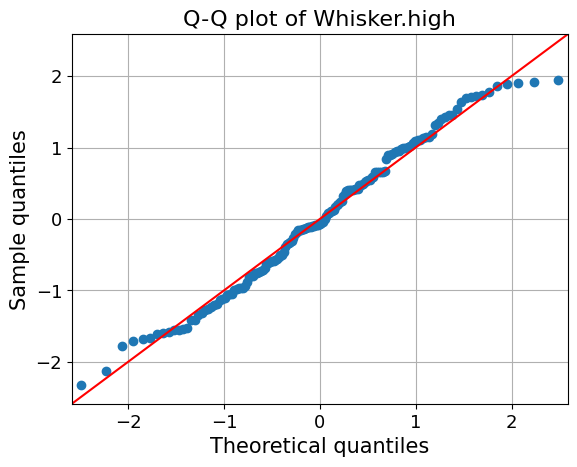

<Figure size 800x500 with 0 Axes>

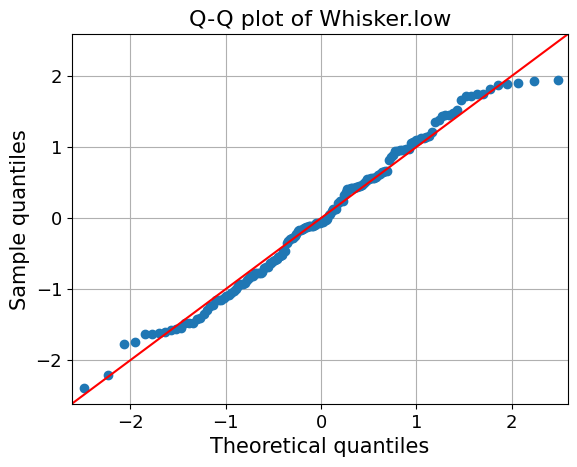

<Figure size 800x500 with 0 Axes>

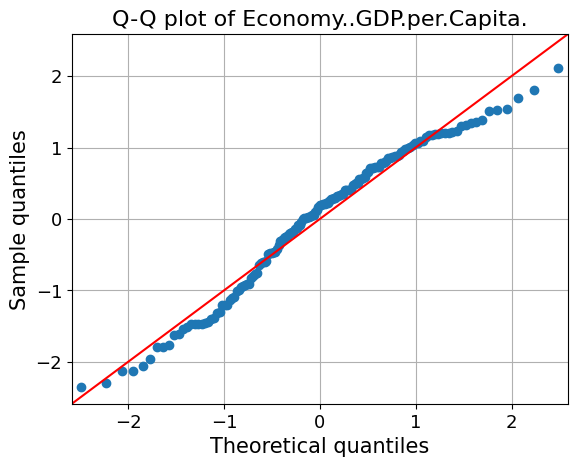

<Figure size 800x500 with 0 Axes>

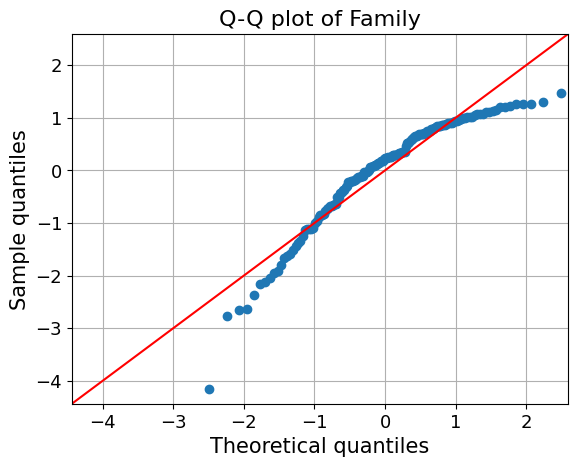

<Figure size 800x500 with 0 Axes>

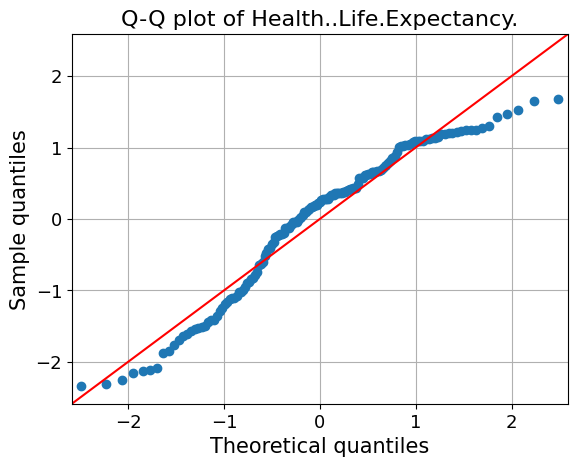

<Figure size 800x500 with 0 Axes>

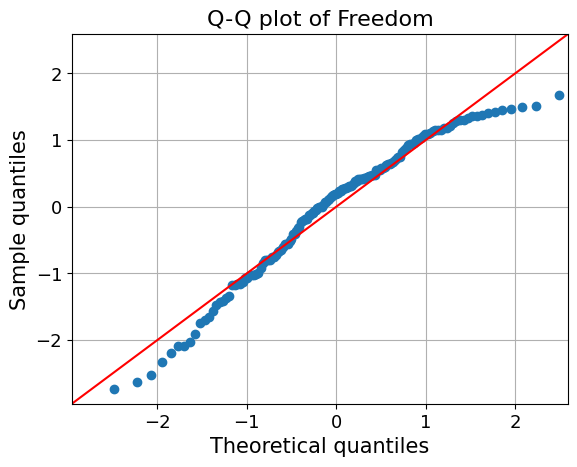

<Figure size 800x500 with 0 Axes>

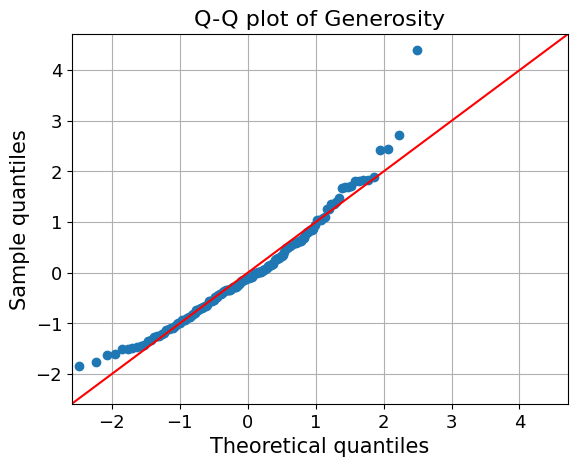

<Figure size 800x500 with 0 Axes>

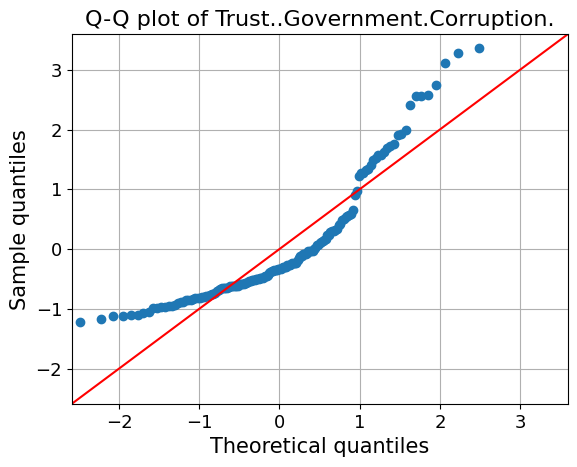

<Figure size 800x500 with 0 Axes>

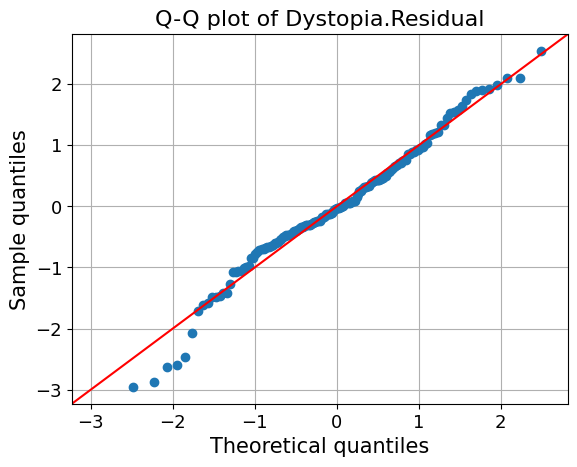

In [ ]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm = data[["Happiness.Rank", "Whisker.high", "Whisker.low", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption.", "Dystopia.Residual"]]

for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

There are few outliers in few of the predictor variables like in Economy..GDP.per.Capita, rust..Government,Corruption, Health..Life.Expectancy, Generosity , Freedom, Family                                  

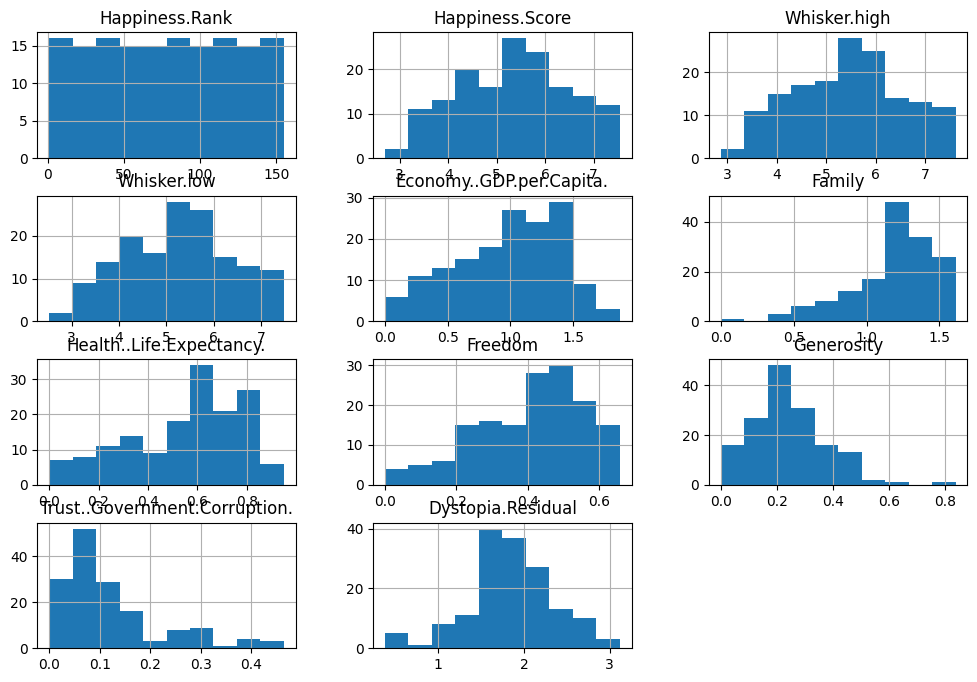

In [ ]:
numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_variables].hist(figsize=(12, 8))
plt.show()

6. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [ ]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Happiness.Score'].sort_values(ascending=False)
print(correlation_with_target)

Happiness.Score                  1.000000
Whisker.low                      0.999520
Whisker.high                     0.999497
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Happiness.Rank                  -0.992774
Name: Happiness.Score, dtype: float64


<ipython-input-50-b2ee2febe196>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<ipython-input-51-0d33ea995755>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

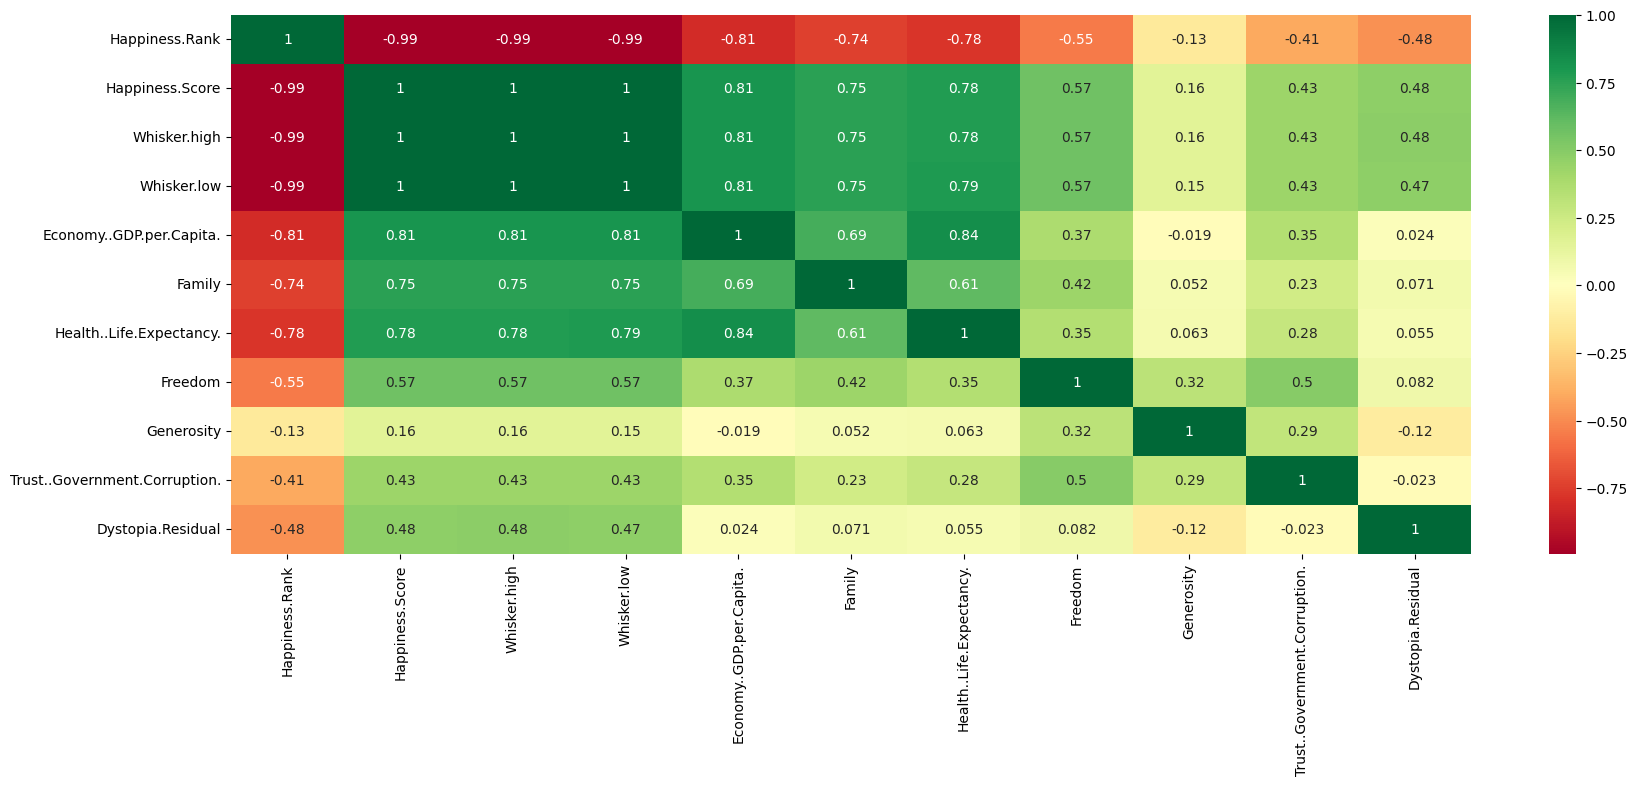

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


Economy..GDP.per.Capita, Health..Life.Expectancy, Family has highest correlation with Happiness score, that's they are directly propotional with the Happiness score. Whereas, Generosity has lowest correlation with Happiness score.

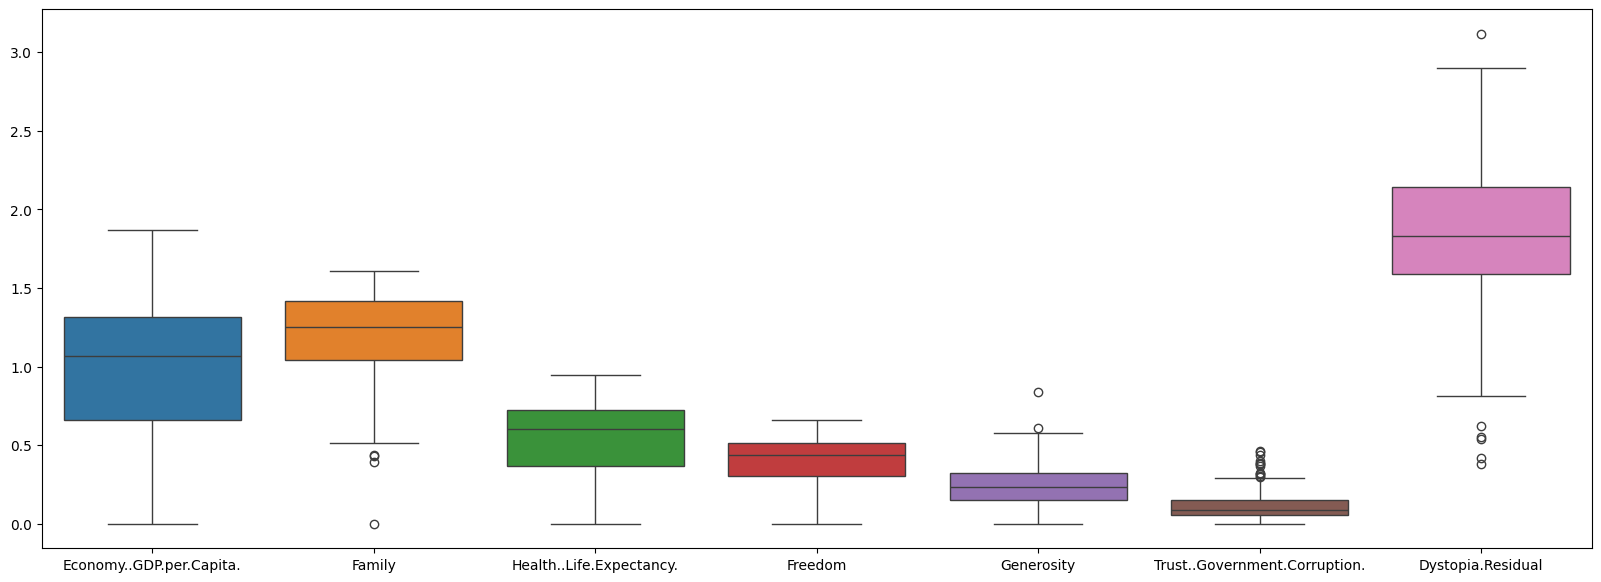

In [ ]:
# Checking the Ranges of the predictor variables and dependent variable
# plt.figure(figsize=(20, 7))
# sns.boxplot(data=data)

# Selecting columns excluding 'Happiness.Rank' and 'Happiness.Score'
columns_to_exclude = ['Happiness.Rank', 'Happiness.Score', 'Whisker.low', 'Whisker.high', 'Country']
columns_to_plot = [col for col in data.columns if col not in columns_to_exclude]

# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data[columns_to_plot])
plt.show()


Freedom                          1
Economy..GDP.per.Capita.         2
Generosity                       3
Dystopia.Residual                4
Family                           5
Health..Life.Expectancy.         6
Trust..Government.Corruption.    7
dtype: int64


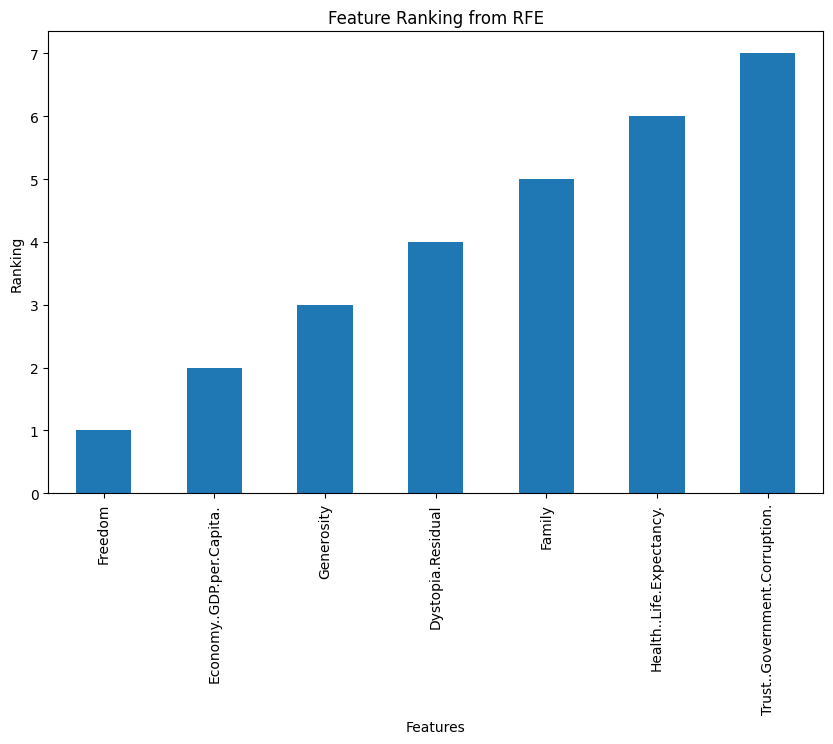

In [ ]:
# Recursive Feature Elimination (RFE)
# This method works by recursively removing the least important features and building a model until the specified number of features is reached.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Use linear regression as the estimator
model = LinearRegression()

# RFE
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)

# Ranking of features
feature_ranking = pd.Series(fit.ranking_, index=X.columns)
feature_ranking = feature_ranking.sort_values()
print(feature_ranking)

# Plotting feature ranking
plt.figure(figsize=(10, 6))
feature_ranking.plot(kind='bar')
plt.title('Feature Ranking from RFE')
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.show()


Health..Life.Expectancy.         0.380093
Economy..GDP.per.Capita.         0.296504
Dystopia.Residual                0.136943
Family                           0.096335
Freedom                          0.063431
Generosity                       0.014593
Trust..Government.Corruption.    0.012100
dtype: float64


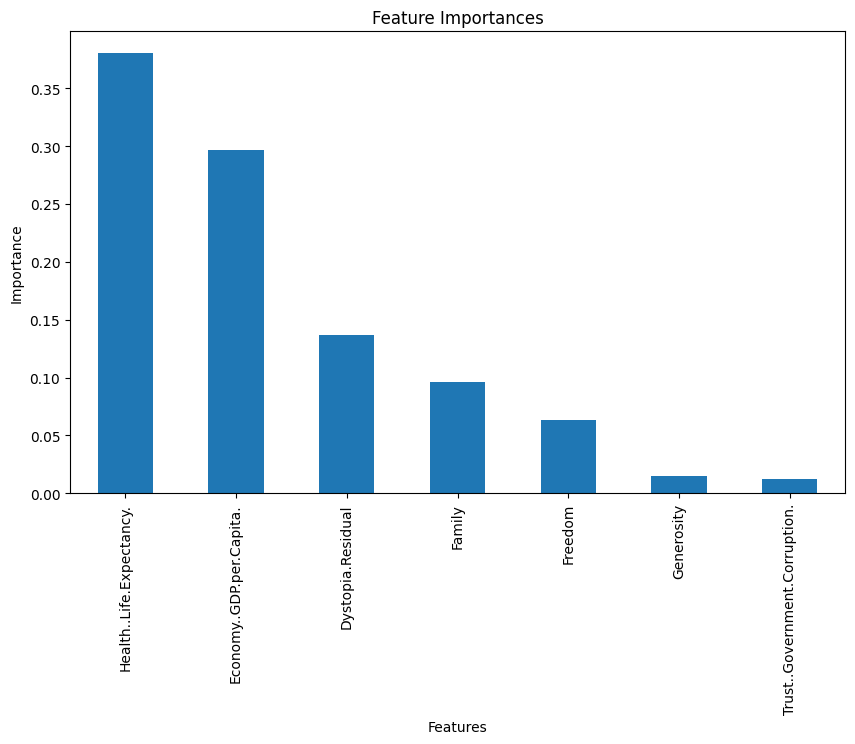

In [ ]:
# Feature Importance with Tree-Based Models
from sklearn.ensemble import RandomForestRegressor

# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Train Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


7. Do the ranges of the predictor variables make sense?

8. What are the distributions of the predictor variables?  

Are training and test sets the same?
False
Are predictor variables independent of each other?


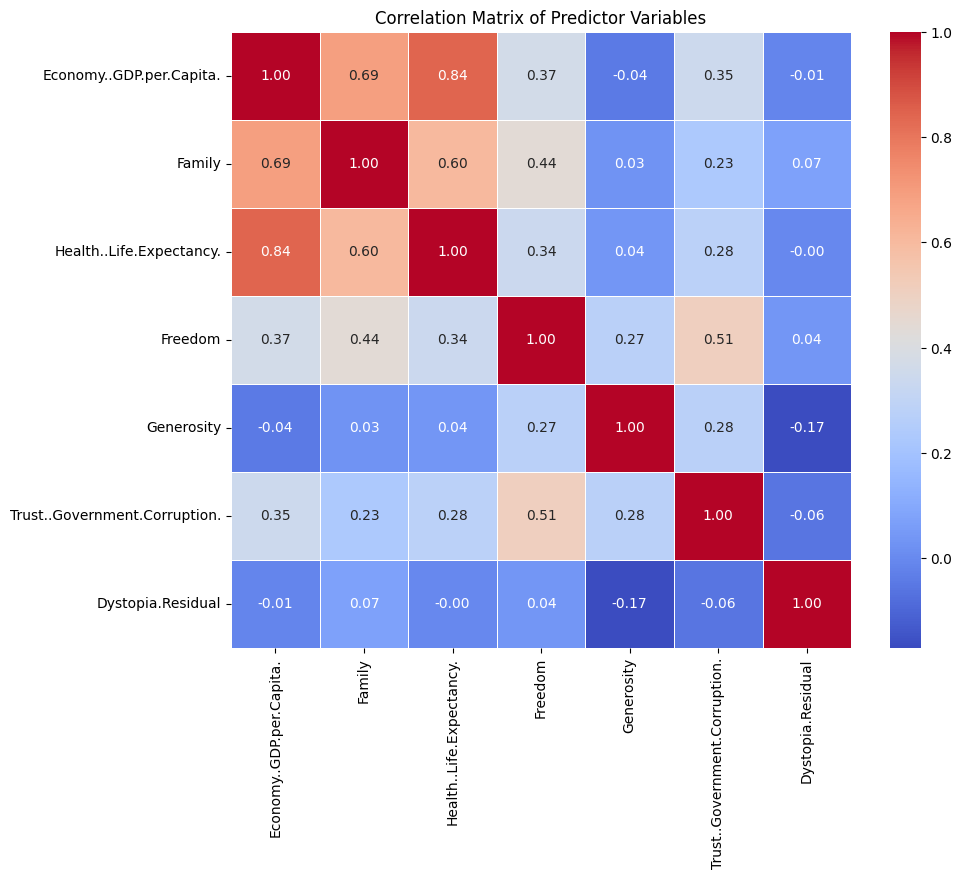

Ranges of predictor variables:
       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                124.000000  124.000000                124.000000   
mean                   0.991580    1.176955                  0.546007   
std                    0.422379    0.295481                  0.236395   
min                    0.000000    0.000000                  0.005565   
25%                    0.665298    1.001758                  0.372545   
50%                    1.044962    1.238733                  0.596865   
75%                    1.329347    1.413272                  0.714354   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  124.000000  124.000000                     124.000000   
mean     0.409969    0.252881                       0.125410   
std      0.151972    0.134461                       0.107598   
min      0.000000    0.010165                       0.0

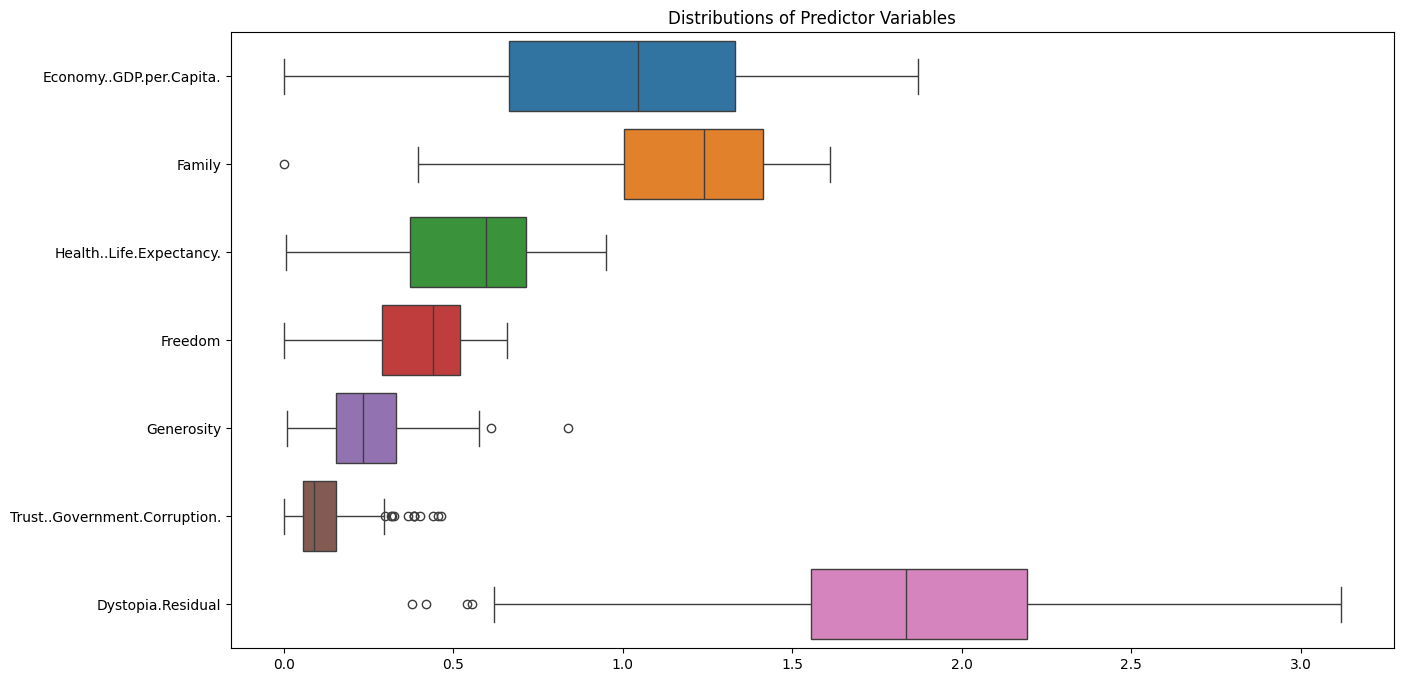

In [ ]:
# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if training and test sets have the same data
print("6. Do the training and test sets have the same data?")
print(X_train.equals(X_test))

# Check if predictor variables are independent of each other
print("7. In the predictor variables independent of all the other predictor variables?")
correlation_matrix = X_train.corr()
#print(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

# Descriptive statistics of predictor variables
print("9. Do the ranges of the predictor variables make sense?")
print("10. Ranges of predictor variables:")
print(X_train.describe())

# Distributions of predictor variables
import matplotlib.pyplot as plt
import seaborn as sns
print("What are the distributions of the predictor variables?  ")
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train, orient="h")
plt.title("Distributions of Predictor Variables")
plt.show()


10. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the original data
model_original = LinearRegression()
model_original.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)

# Example using Z-score to identify and remove outliers:
from scipy.stats import zscore
z_scores = zscore(X_train)
X_train_no_outliers = X_train[(np.abs(z_scores) < 3).all(axis=1)]
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

# Fit a linear regression model to the data without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Evaluate the model without outliers on the test set
y_pred_no_outliers = model_no_outliers.predict(X_test)
mse_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)

# Compare the mean squared errors
print(f"MSE with outliers: {mse_original}")
print(f"MSE without outliers: {mse_no_outliers}")


MSE with outliers: 1.029996263412206e-07
MSE without outliers: 1.0332630809278867e-07


11. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Randomly remove 1%, 5%, and 10% of data
def remove_random_percentage(data, percentage):
    mask = np.random.rand(*data.shape) < (1 - percentage)
    return np.where(mask, data, np.nan)

data_missing_1 = remove_random_percentage(data, 0.01)
data_missing_5 = remove_random_percentage(data, 0.05)
data_missing_10 = remove_random_percentage(data, 0.1)

# Impute missing values using different methods
def impute_data(data_missing):
    imputers = {
        'Mean': SimpleImputer(strategy='mean'),
        'Median': SimpleImputer(strategy='median'),
        'Regression': IterativeImputer(estimator=LinearRegression(), max_iter=10)
    }

    imputed_data = {}

    for name, imputer in imputers.items():
        imputed_data[name] = pd.DataFrame(imputer.fit_transform(data_missing), columns=data.columns)

    return imputed_data

imputed_data_1 = impute_data(data_missing_1)
imputed_data_5 = impute_data(data_missing_5)
imputed_data_10 = impute_data(data_missing_10)

# Calculate % error on residuals for numeric data
def calculate_residuals(data_true, data_imputed):
    residuals = data_true - data_imputed
    percentage_errors = np.abs(residuals / data_true) * 100
    return percentage_errors

percentage_errors_1 = {name: calculate_residuals(data, imputed_data) for name, imputed_data in imputed_data_1.items()}
percentage_errors_5 = {name: calculate_residuals(data, imputed_data) for name, imputed_data in imputed_data_5.items()}
percentage_errors_10 = {name: calculate_residuals(data, imputed_data) for name, imputed_data in imputed_data_10.items()}

# Check for bias and variance of the error
def analyze_bias_variance(percentage_errors):
    bias = np.mean(percentage_errors)
    variance = np.var(percentage_errors)
    return bias, variance

# Display results
def display_results(bias_variance, title):
    print(f"\n{title}")
    for name, (bias, variance) in bias_variance.items():
        print(f"{name}: Bias - {bias:.2f}%, Variance - {variance:.2f}%")

# Results for 1% missing data
bias_variance_1 = {name: analyze_bias_variance(errors.values.flatten()) for name, errors in percentage_errors_1.items()}
display_results(bias_variance_1, "Bias and Variance for 1% missing data")

# Results for 5% missing data
bias_variance_5 = {name: analyze_bias_variance(errors.values.flatten()) for name, errors in percentage_errors_5.items()}
display_results(bias_variance_5, "Bias and Variance for 5% missing data")

# Results for 10% missing data
bias_variance_10 = {name: analyze_bias_variance(errors.values.flatten()) for name, errors in percentage_errors_10.items()}
display_results(bias_variance_10, "Bias and Variance for 10% missing data")




Bias and Variance for 1% missing data
Mean: Bias - 3.74%, Variance - 2938.16%
Median: Bias - 3.93%, Variance - 3223.56%
Regression: Bias - 3.48%, Variance - 2722.22%

Bias and Variance for 5% missing data
Mean: Bias - 14.01%, Variance - 22168.69%
Median: Bias - 13.75%, Variance - 23610.45%
Regression: Bias - 13.85%, Variance - 19394.37%

Bias and Variance for 10% missing data
Mean: Bias - 9.82%, Variance - 3508.81%
Median: Bias - 10.07%, Variance - 3707.17%
Regression: Bias - 9.16%, Variance - 3041.93%


MIT License

Copyright (c) 2024 prachichatur04

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.